In [41]:
print("FWI Prediction Model")

FWI Prediction Model


In [6]:
# Step-1:Loading the dataset
import pandas as pd
df = pd.read_csv("FWI Dataset.csv")
#Step-2: Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB
None


In [8]:
#Printing the first 5 rows of the dataset
print(df.head())

   day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2  3.9   

   FWI    Classes    Region  
0  0.5  not fire     Bejaia  
1  0.4  not fire     Bejaia  
2  0.1  not fire     Bejaia  
3    0  not fire     Bejaia  
4  0.5  not fire     Bejaia  


In [9]:
#printing the last rows in the dataset
print(df.tail())

     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI  \
239   26      9  2012           30   65   14    0.0  85.4  16.0  44.5  4.5   
240   27      9  2012           28   87   15    4.4  41.1   6.5     8  0.1   
241   28      9  2012           27   87   29    0.5  45.9   3.5   7.9  0.4   
242   29      9  2012           24   54   18    0.1  79.7   4.3  15.2  1.7   
243   30      9  2012           24   64   15    0.2  67.3   3.8  16.5  1.2   

      BUI  FWI     Classes            Region  
239  16.9  6.5       fire     Sidi-Bel Abbes  
240   6.2    0   not fire     Sidi-Bel Abbes  
241   3.4  0.2   not fire     Sidi-Bel Abbes  
242   5.1  0.7   not fire     Sidi-Bel Abbes  
243   4.8  0.5  not fire      Sidi-Bel Abbes  


In [ ]:
#Stripping the whitespace from column names for more clairty
df.columns = df.columns.str.strip()
print("Column names after stripping whitespace:")
print(df.columns.tolist())

Column names after stripping whitespace:
['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']


In [19]:
#Since the 'FWI' and 'DC' columns contain non-numeric values, we use errors="coerce" to convert them to NaN 
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')
df['DC'] = pd.to_numeric(df['DC'], errors='coerce')
#Converting the 'FWI' and 'DC' columns to numeric data types
df['FWI'] = pd.to_numeric(df['FWI'])
df['DC'] = pd.to_numeric(df['DC'])
#printing the data types of each column after conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB
None


In [ ]:
#Step-3: Data Preprocessing
#Handling missing values by removing rows with NaN values in 'FWI' and 'DC' columns
df = df.dropna(subset=['FWI', 'DC'])
print("Data after removing rows with missing 'FWI' and 'DC' values:")
print(df.info())

Data after removing rows with missing 'FWI' and 'DC' values:
<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 30.4+ KB
None


In [ ]:
#Step:4 Handling the null values if any
print(df.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


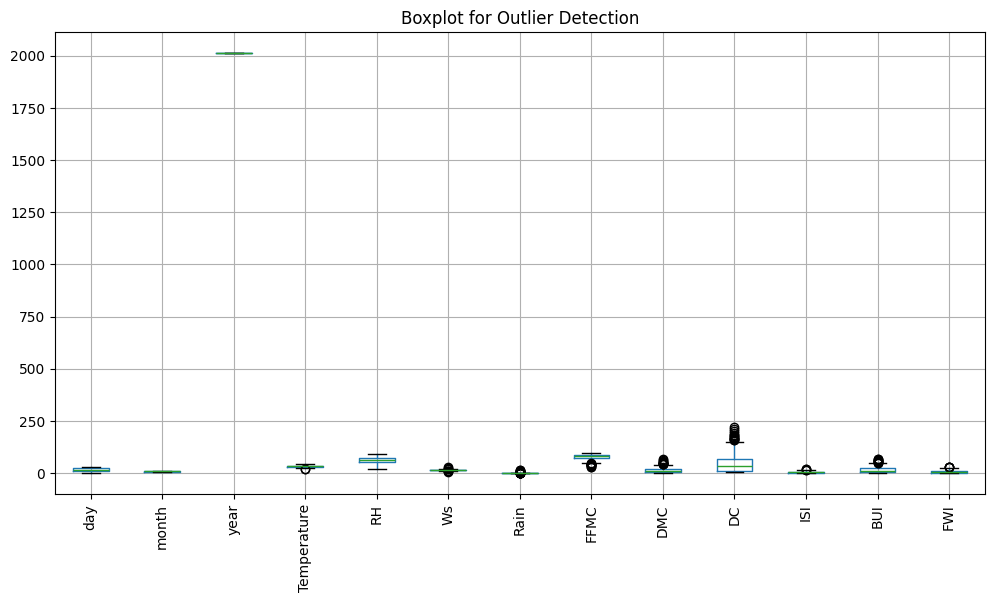

In [ ]:
#Step-5: Outlier Detection using Boxplot
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,6))
df.select_dtypes(include=np.number).boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
#Step 6: Removing Outliers using IQR method
num_cols = df.select_dtypes(include=['float64','int64']).columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

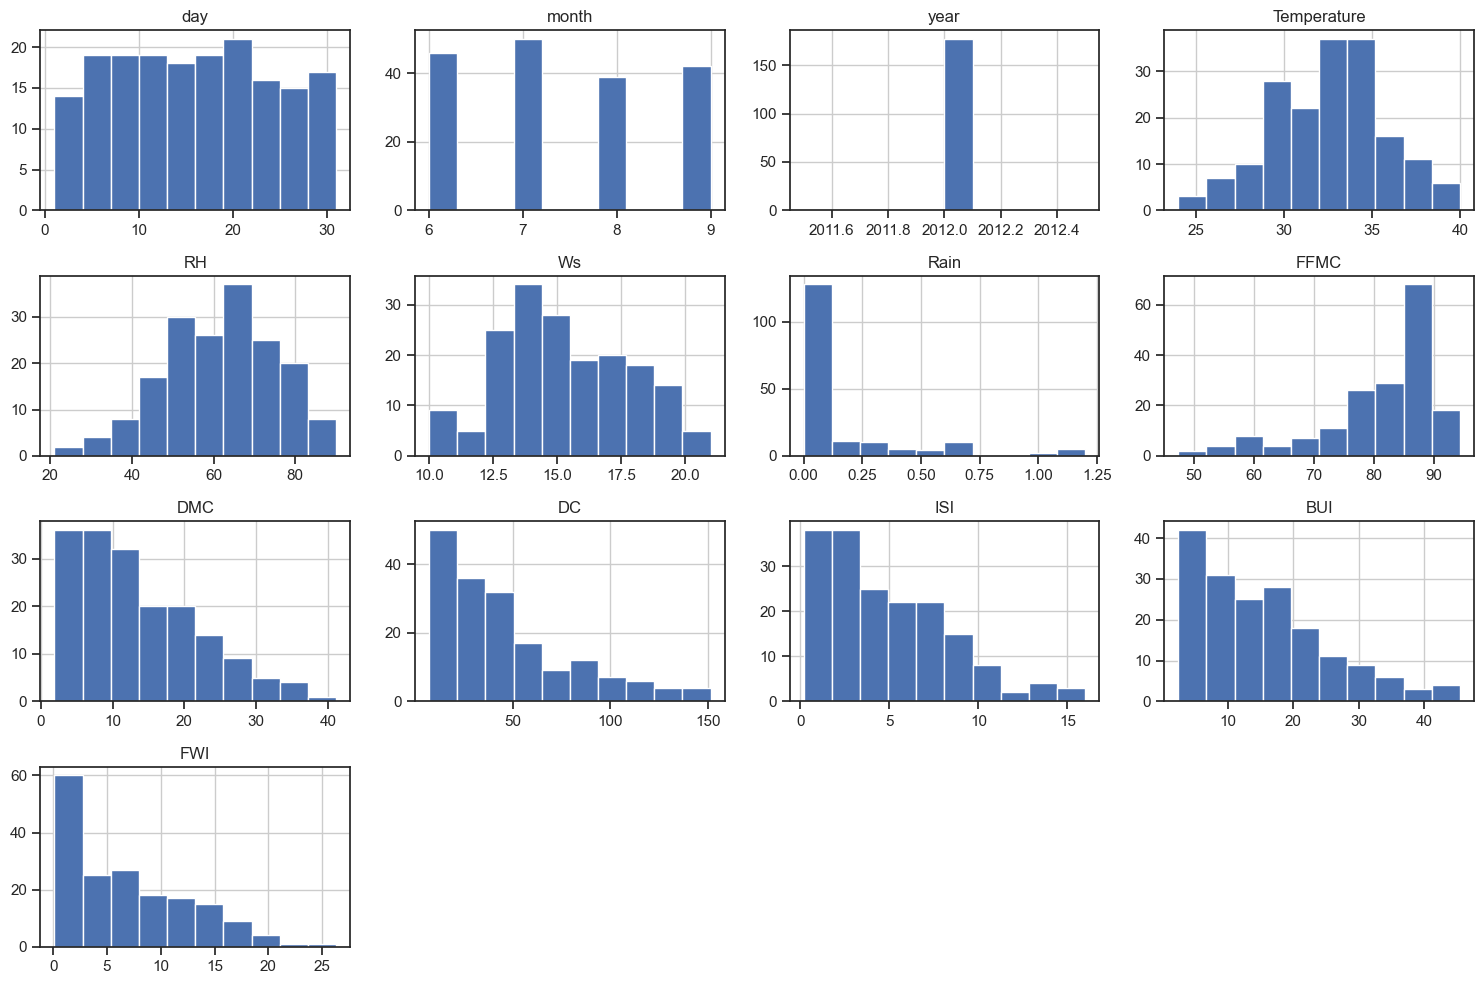

In [ ]:
#Step 7: Visualizing Data Distribution using Histograms
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

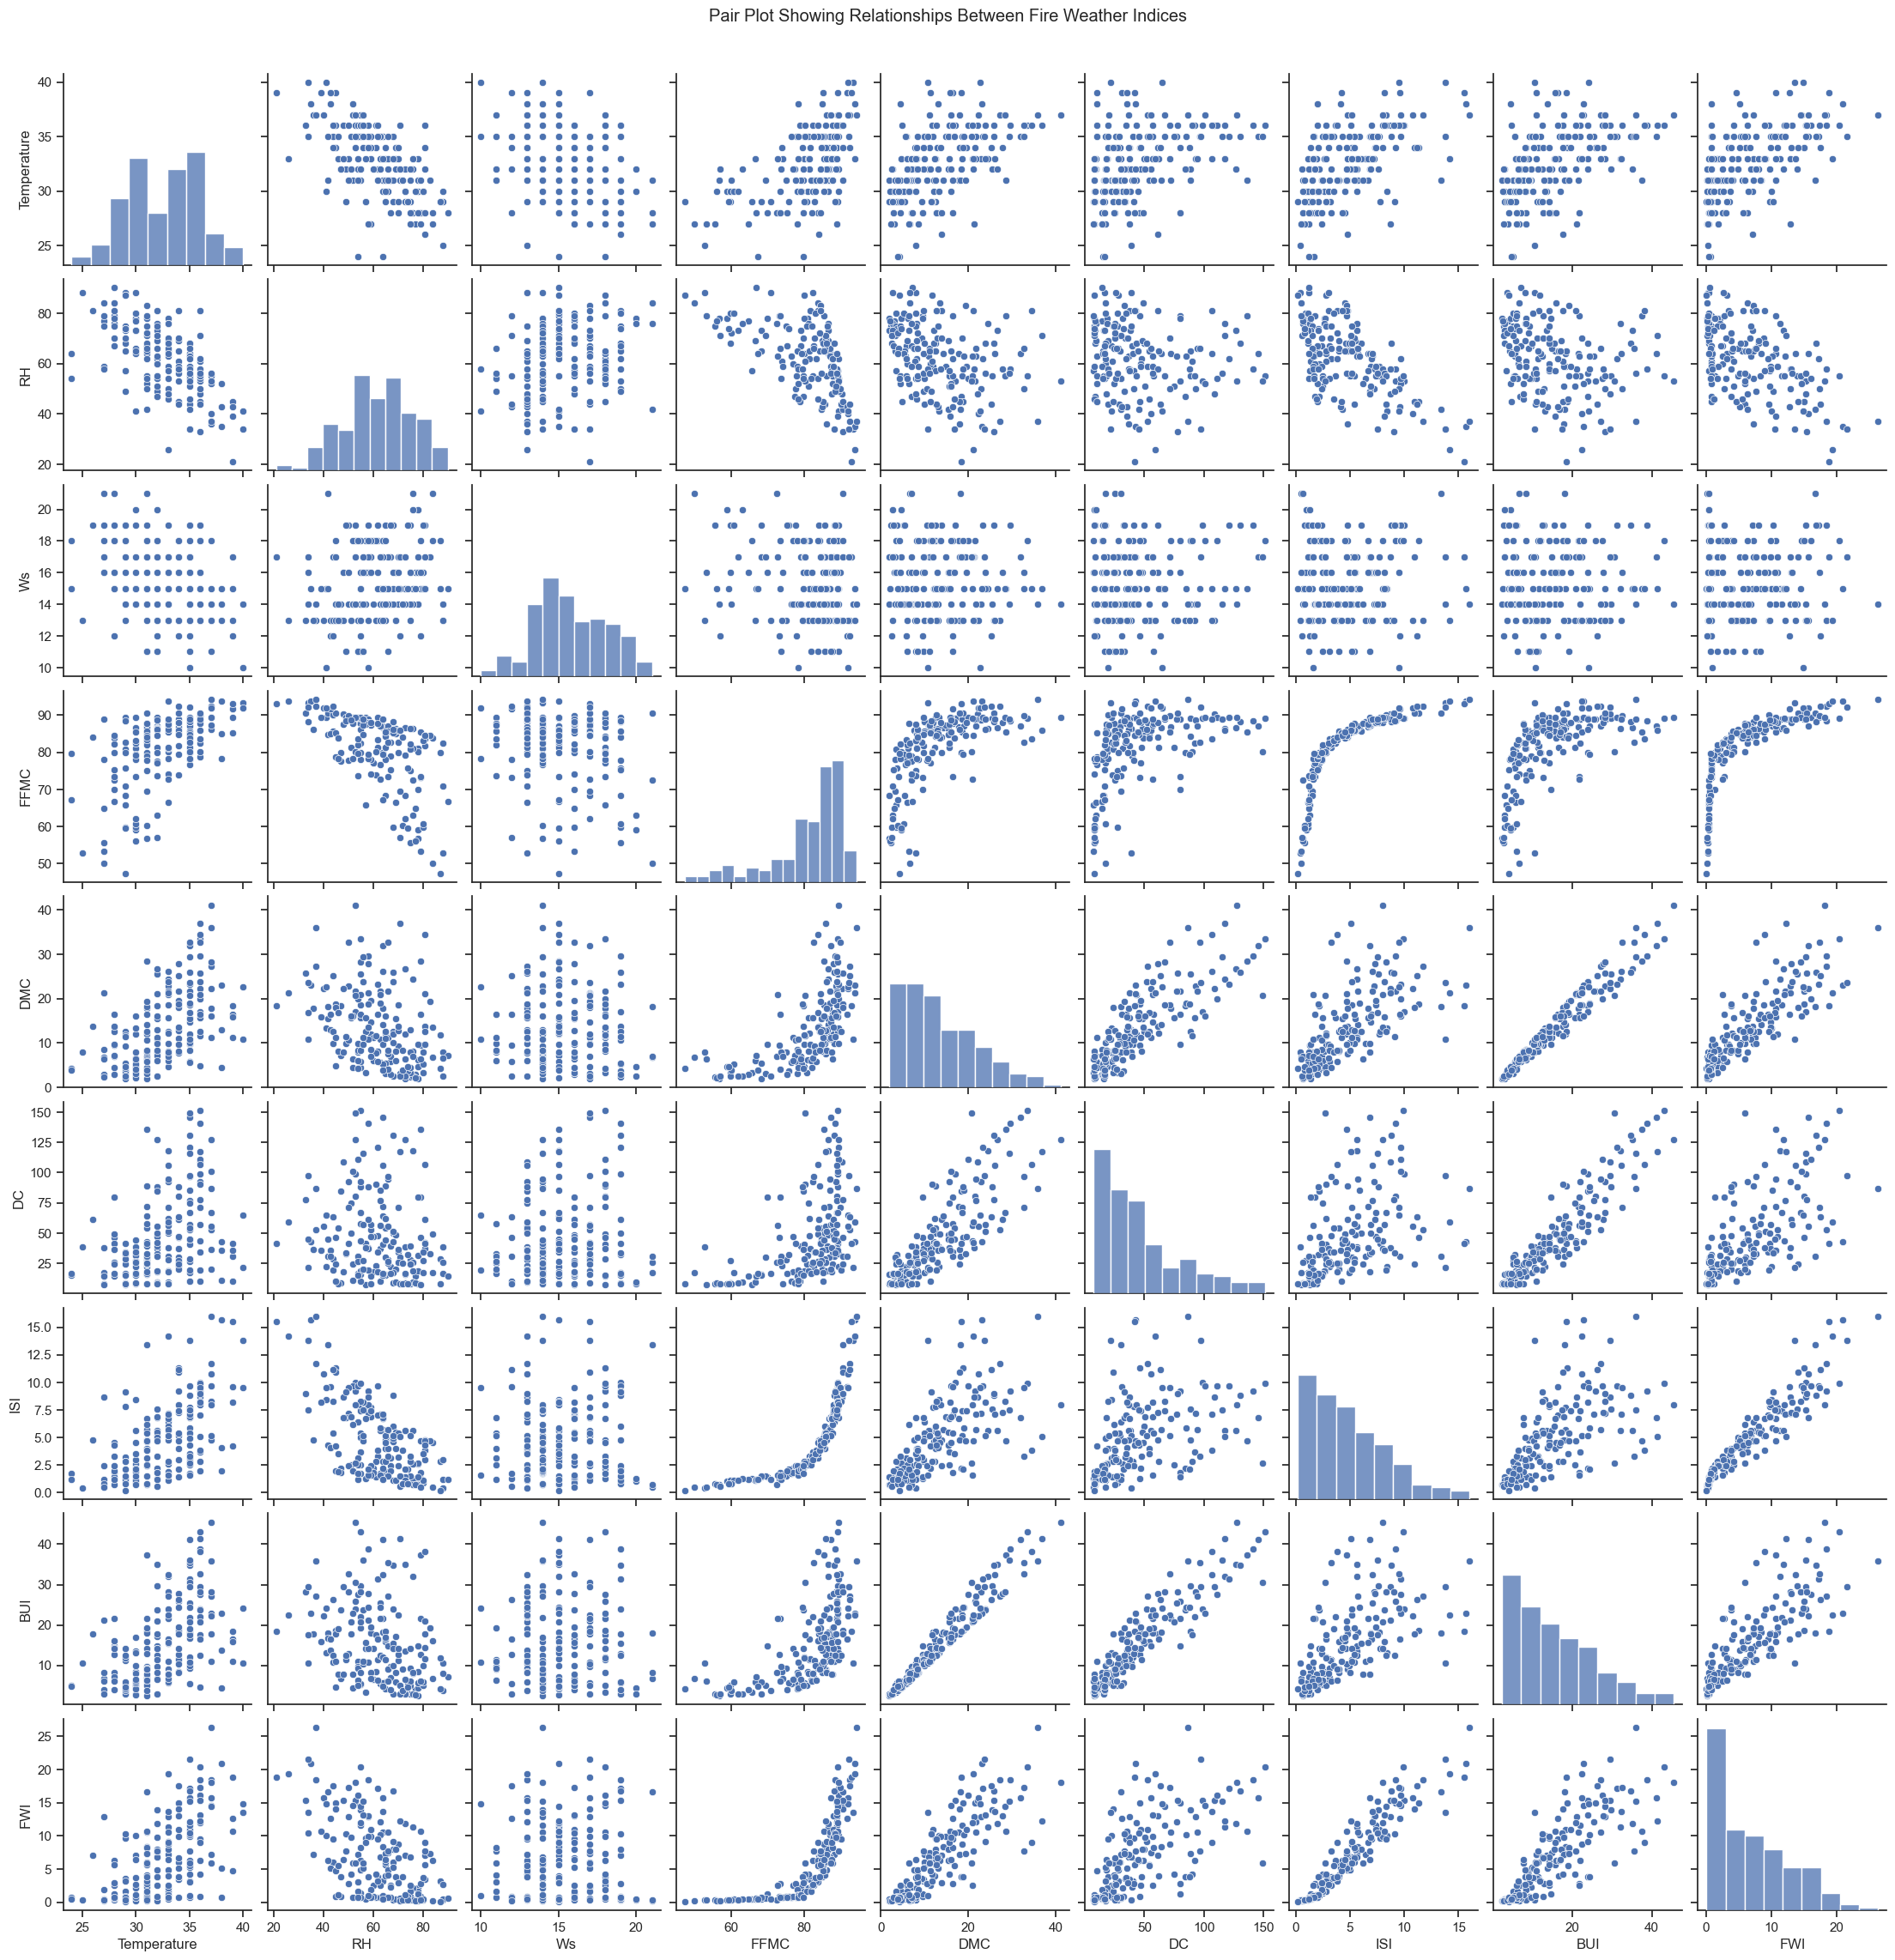

In [ ]:
#Step 8: Pairplot to visualize relationships between features
import seaborn as sns
pair_features =['Temperature', 'RH', 'Ws','FFMC', 'DMC', 'DC','ISI', 'BUI', 'FWI']
sns.pairplot(df[pair_features], diag_kind='hist')
plt.suptitle("Pair Plot Showing Relationships Between Fire Weather Indices", y=1.02)
plt.show()

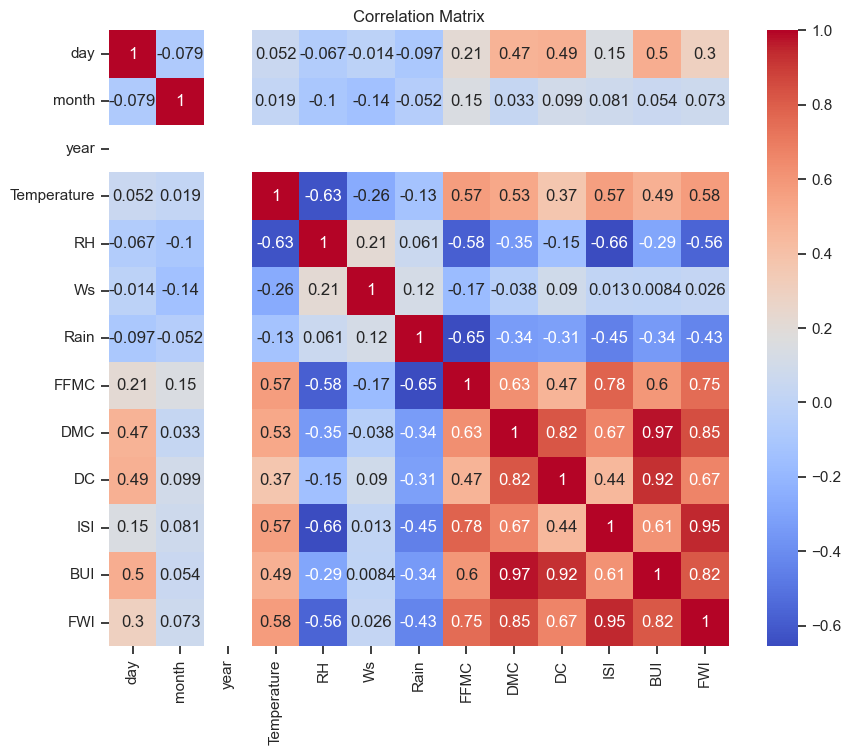

In [ ]:
#Step 9: Correlation Heatmap or Matrix
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Step 10:Encode categorical variables 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

In [52]:
#Checking the final preprocessed data
df.isnull().sum()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          177 non-null    int64  
 1   month        177 non-null    int64  
 2   year         177 non-null    int64  
 3   Temperature  177 non-null    int64  
 4   RH           177 non-null    int64  
 5   Ws           177 non-null    int64  
 6   Rain         177 non-null    float64
 7   FFMC         177 non-null    float64
 8   DMC          177 non-null    float64
 9   DC           177 non-null    float64
 10  ISI          177 non-null    float64
 11  BUI          177 non-null    float64
 12  FWI          177 non-null    float64
 13  Classes      177 non-null    object 
 14  Region       177 non-null    int32  
dtypes: float64(7), int32(1), int64(6), object(1)
memory usage: 21.4+ KB
None


In [53]:
#Step 11: Dropping the classes column 
df = df.drop('Classes', axis=1)
print("Data after dropping 'Classes' column:")
print(df.info())

Data after dropping 'Classes' column:
<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          177 non-null    int64  
 1   month        177 non-null    int64  
 2   year         177 non-null    int64  
 3   Temperature  177 non-null    int64  
 4   RH           177 non-null    int64  
 5   Ws           177 non-null    int64  
 6   Rain         177 non-null    float64
 7   FFMC         177 non-null    float64
 8   DMC          177 non-null    float64
 9   DC           177 non-null    float64
 10  ISI          177 non-null    float64
 11  BUI          177 non-null    float64
 12  FWI          177 non-null    float64
 13  Region       177 non-null    int32  
dtypes: float64(7), int32(1), int64(6)
memory usage: 20.1 KB
None


In [54]:
#Atep 12: Saving the cleaned dataset to a new CSV file
df.to_csv("FWI_Cleaned_Dataset.csv", index=False)